# Network Analysis in Python (Part 1-4) - Case Study

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.read_gpickle('github_users.p')

## Characterizing the network

### Characterizing the network (I)

To start out, let's do some basic characterization of the network, by looking at the number of nodes and number of edges in a network. It has been pre-loaded as G and is available for exploration in the IPython Shell. Your job in this exercise is to identify how many nodes and edges are present in the network. You can use the functions len(G.nodes()) and len(G.edges()) to calculate the number of nodes and edges respectively.

In [3]:
len(G.nodes())

56519

In [4]:
len(G.edges())

74095

### Characterizing the network (II)

Let's continue recalling what you've learned before about node importances, by plotting the degree distribution of a network. This is the distribution of node degrees computed across all nodes in a network.

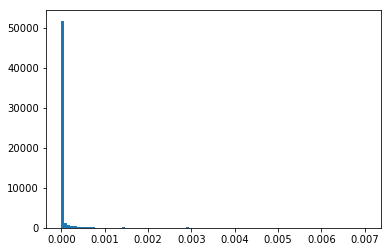

In [5]:
# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.degree_centrality(G).values()), bins=100)
plt.show()


###  Characterizing the network (III)

The last exercise was on degree centrality; this time round, let's recall betweenness centrality!


In [6]:
sub_nodes = ['u3954', 'u366', 'u2159', 'u3756', 'u3985', 'u9124', 'u6482', 'u6794', 'u1627', 'u6728', 'u2175', 'u1116', 'u5754', 'u845', 'u534', 'u9967', 'u4034', 'u1863', 'u221', 'u886', 'u3269', 'u6554', 'u7629', 'u1087', 'u2022', 'u1773', 'u6162', 'u576', 'u45636', 'u4656', 'u203', 'u10020', 'u1849', 'u2356', 'u5578', 'u3930', 'u2502', 'u3135', 'u3305', 'u3441', 'u6984', 'u7960', 'u10579', 'u2846', 'u116', 'u322', 'u6738', 'u4063', 'u8657', 'u4498', 'u24', 'u4392', 'u4546', 'u9044', 'u37', 'u10566', 'u1814']
G = G.subgraph(sub_nodes)

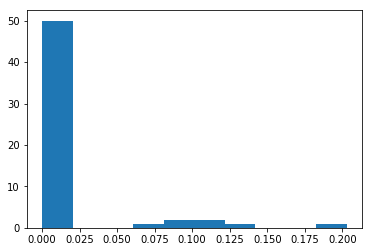

In [7]:
# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.betweenness_centrality(G).values()))
plt.show()


## Visualization

### MatrixPlot

Let's now practice making some visualizations. The first one will be the MatrixPlot. In a MatrixPlot, the matrix is the representation of the edges.

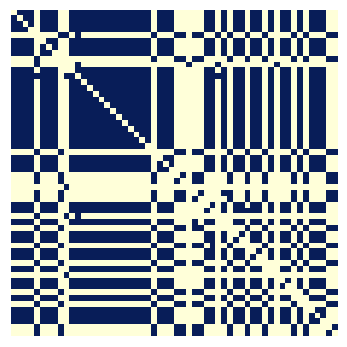

In [8]:
# Import necessary modules
from nxviz import MatrixPlot

# Calculate the largest connected component subgraph: largest_ccs
largest_ccs = sorted(nx.connected_component_subgraphs(G), key=lambda x: len(x))[-1]

# Create the customized MatrixPlot object: h
h = MatrixPlot(graph=largest_ccs)

# Draw the MatrixPlot to the screen
h.draw()
plt.show()

### ArcPlot

Next up, let's use the ArcPlot to visualize the network. You're going to practice sorting the nodes in the graph as well.



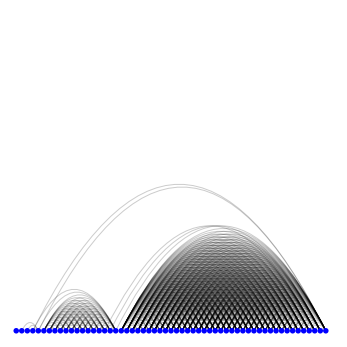

In [9]:
# Import necessary modules
from nxviz.plots import ArcPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes in G, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G, n)
    
# Create the ArcPlot object: a
a = ArcPlot(graph=G, node_order='degree')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

### CircosPlot

Finally, you're going to make a CircosPlot of the network!

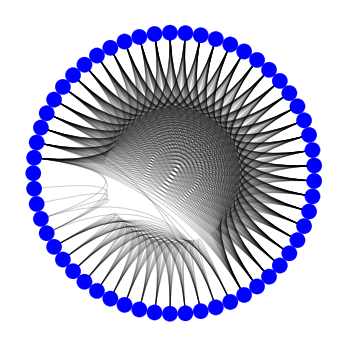

In [10]:
# Import necessary modules
from nxviz import CircosPlot
import matplotlib.pyplot as plt 
 
# Iterate over all the nodes, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G, n)

# Create the CircosPlot object: c
c = CircosPlot(graph=G, node_order='degree')

# Draw the CircosPlot object to the screen
c.draw()
plt.show()

## Cliques

### Finding cliques (I)

You're now going to practice finding cliques in G. Recall that cliques are "groups of nodes that are fully connected to one another", while a maximal clique is a clique that cannot be extended by adding another node in the graph.

In [11]:
# Calculate the maximal cliques in G: cliques
cliques = nx.find_cliques(G)

# Count and print the number of maximal cliques in G
print(len(list(cliques)))

8


### Finding cliques (II)

Great work! Let's continue by finding a particular maximal clique, and then plotting that clique.

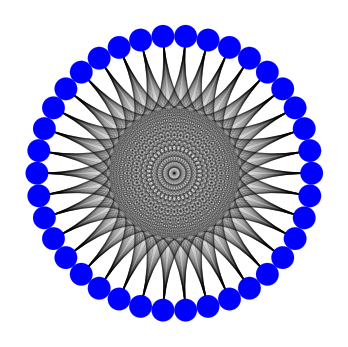

In [12]:
# Import necessary modules
import networkx as nx
from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(G), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
G_lc = G.subgraph(largest_clique)

# Create the CircosPlot object: c
c = CircosPlot(G_lc)

# Draw the CircosPlot to the screen
c.draw()
plt.show()

## Final tasks

### Finding important collaborators

Almost there! You'll now look at important nodes once more. Here, you'll make use of the degree_centrality() and betweenness_centrality() functions in NetworkX to compute each of the respective centrality scores, and then use that information to find the "important nodes". In other words, your job in this exercise is to find the user(s) that have collaborated with the most number of users.

In [13]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(G)

# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)

['u2159']


### Characterizing editing communities

You're now going to combine what you've learned about the BFS algorithm and concept of maximal cliques to visualize the network with an ArcPlot.

The largest maximal clique in the Github user collaboration network has been assigned to the subgraph G_lmc.

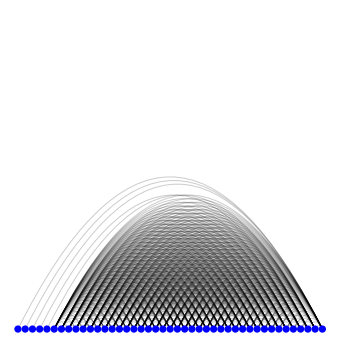

In [14]:
# Import necessary modules
from nxviz import ArcPlot
import matplotlib.pyplot as plt
 
# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(G), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = G.subgraph(largest_max_clique)

# Go out 1 degree of separation
for node in G_lmc.nodes():
    G_lmc.add_nodes_from(G.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(G.neighbors(node)), G.neighbors(node)))

# Record each node's degree centrality score
for n in G_lmc.nodes():
    G_lmc.node[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]
        
# Create the ArcPlot object: a
a = ArcPlot(G_lmc, node_order='degree centrality')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

### Recommending co-editors who have yet to edit together

Finally, you're going to leverage the concept of open triangles to recommend users on GitHub to collaborate!

In [15]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in G.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):
        
            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)


[('u2159', 'u534'), ('u2159', 'u37'), ('u366', 'u3305'), ('u366', 'u322'), ('u3305', 'u37')]
